In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import cifar10

In [5]:
type(cifar10)

module

##  Load Data

In [6]:
data = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [7]:
type(data)

tuple

In [8]:
(X_train,Y_train),(X_test,Y_test)=data

In [9]:
X_train[0].shape

(32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

## Normalization 

In [11]:
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
def get_model(input_shape):
    model = tf.keras.Sequential([
        Conv2D(filters= 16, kernel_size = 3, input_shape= input_shape ,activation = 'relu', padding = 'same'),
        MaxPooling2D((2,2)),
        Conv2D(filters= 32, kernel_size = 3, input_shape= input_shape ,activation = 'relu', padding = 'same'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(256, activation = 'relu'),
        Dropout(0.3),
        Dense(256, activation = 'relu'),
        Dropout(0.3),
        Dense(10, activation = 'softmax')
    ])
    return model

In [13]:
model = get_model(X_train[0].shape)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
             )

In [16]:
history = model.fit(X_train, Y_train,validation_split=0.15,batch_size = 64, epochs = 5)

Epoch 1/5
665/665 [==============================] - 43s 63ms/step - loss: 1.5986 - accuracy: 0.4123 - val_loss: 1.2934 - val_accuracy: 0.5279
Epoch 2/5
665/665 [==============================] - 41s 62ms/step - loss: 1.2137 - accuracy: 0.5648 - val_loss: 1.2331 - val_accuracy: 0.5603
Epoch 3/5
665/665 [==============================] - 42s 64ms/step - loss: 1.0695 - accuracy: 0.6207 - val_loss: 1.0143 - val_accuracy: 0.6349
Epoch 4/5
665/665 [==============================] - 41s 62ms/step - loss: 0.9666 - accuracy: 0.6596 - val_loss: 1.0138 - val_accuracy: 0.6455
Epoch 5/5
665/665 [==============================] - 41s 62ms/step - loss: 0.8923 - accuracy: 0.6848 - val_loss: 0.9568 - val_accuracy: 0.6676


In [17]:
history = pd.DataFrame(history.history)

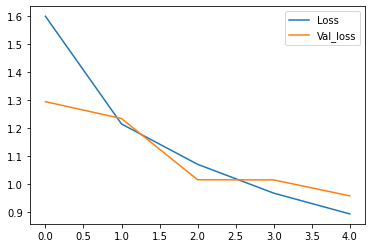

In [18]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['Loss','Val_loss'])

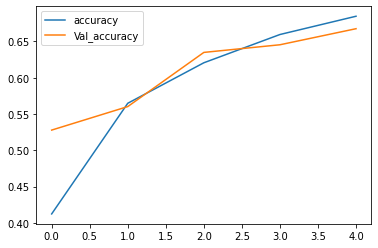

In [19]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy','Val_accuracy'])

In [20]:
model.evaluate(X_test,Y_test, verbose=2)

313/313 - 3s - loss: 0.9606 - accuracy: 0.6646 - 3s/epoch - 9ms/step


[0.9606254696846008, 0.6646000146865845]

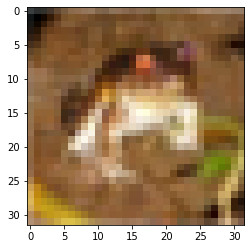

In [ ]:
plt.imshow(X_train[0])

In [ ]:
tf.__version__

'2.0.0'